# Long Short Term Memory (LSTM)
Long short-term memory (LSTM) units (or blocks) are a building unit for layers of a recurrent neural network (RNN). A RNN composed of LSTM units is often called an LSTM network. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell is responsible for "remembering" values over arbitrary time intervals; hence the word "memory" in LSTM. Each of the three gates can be thought of as a "conventional" artificial neuron, as in a multi-layer (or feedforward) neural network: that is, they compute an activation (using an activation function) of a weighted sum. Intuitively, they can be thought as regulators of the flow of values that goes through the connections of the LSTM; hence the denotation "gate". There are connections between these gates and the cell.

The expression long short-term refers to the fact that LSTM is a model for the short-term memory which can last for a long period of time. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events. LSTMs were developed to deal with the exploding and vanishing gradient problem when training traditional RNNs.

Components of LSTMs
So the LSTM cell contains the following components



1.   Forget Gate “f” ( a neural network with sigmoid)
2.   Candidate layer “C"(a NN with Tanh)
3.   Input Gate “I” ( a NN with sigmoid )
4.   Output Gate “O”( a NN with sigmoid)
5.   Hidden state “H” ( a vector )
6.   Memory state “C” ( a vector)
7. Inputs to the LSTM cell at any step are Xt (current input) , Ht-1 (previous hidden state ) and Ct-1 (previous memory state).
8. Outputs from the LSTM cell are Ht (current hidden state ) and Ct (current memory state)

# Gated Recurrent Units (GRU)
In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the outpu, .neither they have the output gate.

# Multiple Stock Prediction Using Time series (LSTM / GRU) in Deep Learning

In [1]:
# reference:
# https://www.kaggle.com/humamfauzi/multiple-stock-prediction-using-single-nn/notebook
# https://medium.com/neuronio/predicting-stock-prices-with-lstm-349f5a0974d4
# https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#plt.style.use('seaborn-whitegrid')

#!pip install SDG
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
#from keras.optimizers import SGD
#from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [3]:
# Some functions to help out with
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [4]:
# Take input and print Ticker Symbol
import os
fileList = os.listdir("/content/")
companyList = []
for file in fileList:
    companyName = file.split("_")[0]
    if companyName != "all" and companyName != ".config" and companyName != "sample":
        companyList.append(companyName)
print(companyList)

['nl', 'eml', 'conf', 'veff', 'na', 'bi', 'bl', 'neff', 'rs', 'pf', 'Aeff', 'sc', 'tx', 'disp']


In [5]:
# First, we get the data
# We pick the tech companies from our list. We import each data and place it in a dictionary with key is its ticker symbol
stockList = ["neff", "Aeff", "disp", "conf", "bi", "pf", "eml", "sc", "bl", "tx", "rs", "nl", "na", "veff"]
df_ = {}
for i in stockList:
    df_[i] = pd.read_excel("/content/" + i + "_train.xlsx", index_col="wavelength", parse_dates=["wavelength"])

In [6]:
def split(dataframe, border, col):
    return dataframe.loc[:border,col], dataframe.loc[border:,col]
split_point = 1.54
df_new = {}
for i in stockList:
    df_new[i] = {}
    df_new[i]["Train"], df_new[i]["Test"] = split(df_[i], split_point, "y_train")

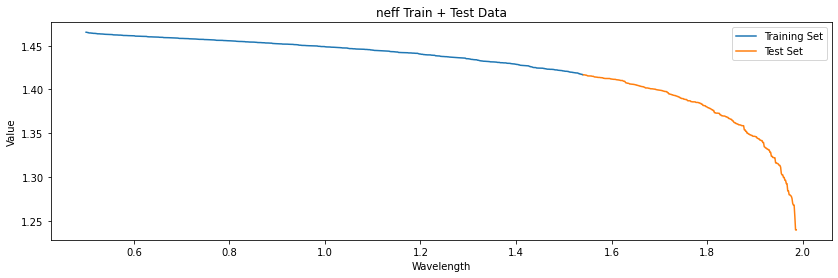

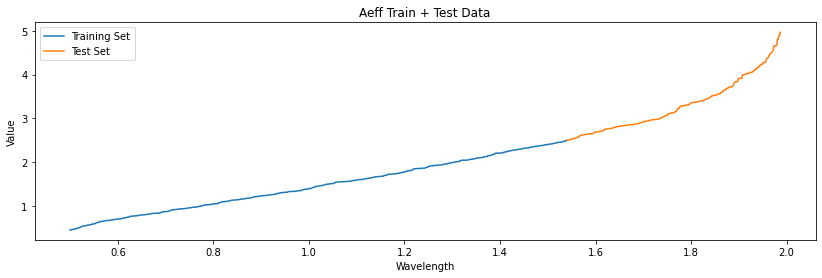

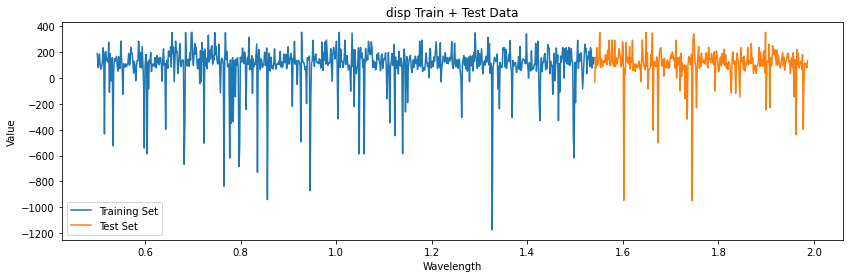

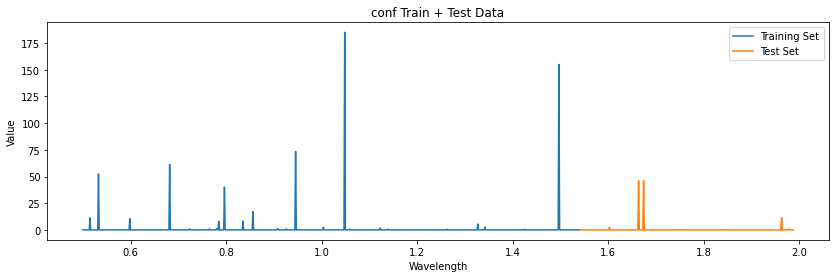

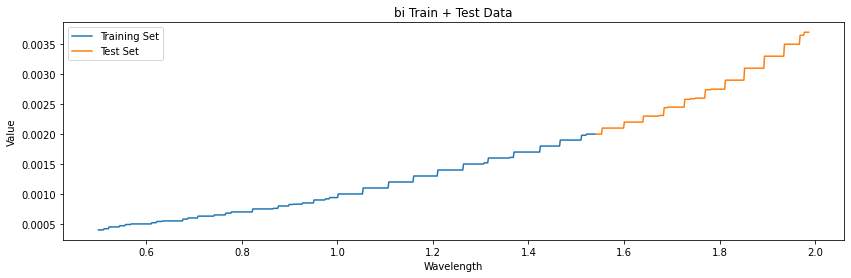

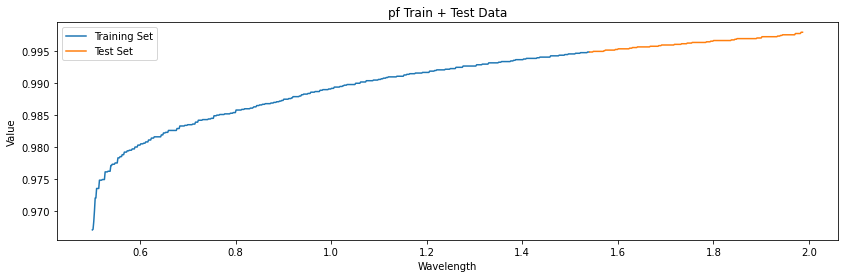

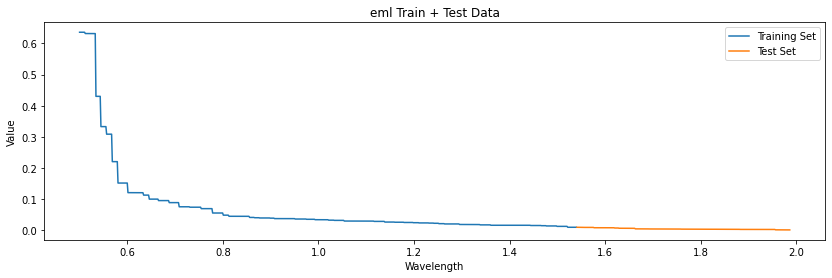

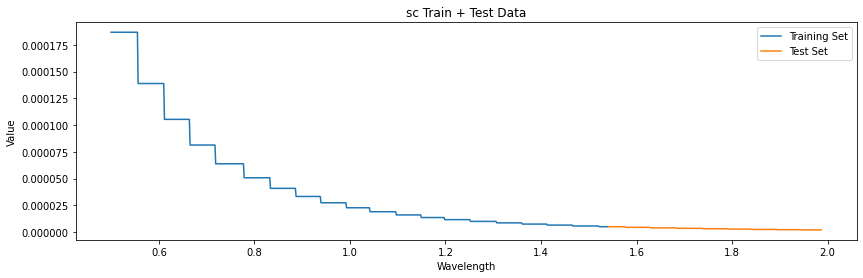

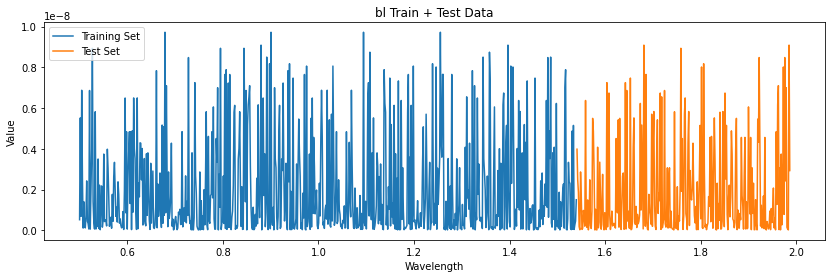

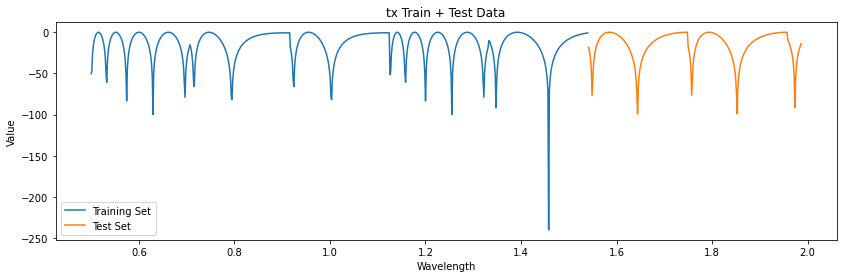

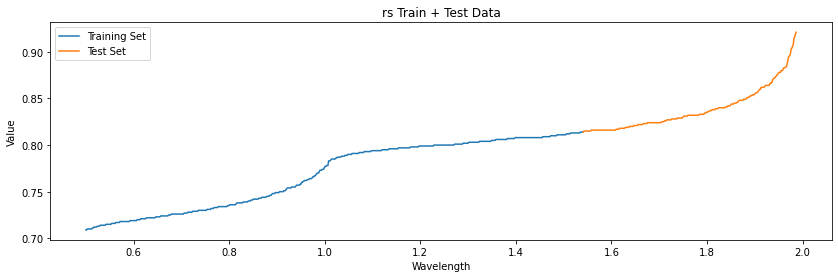

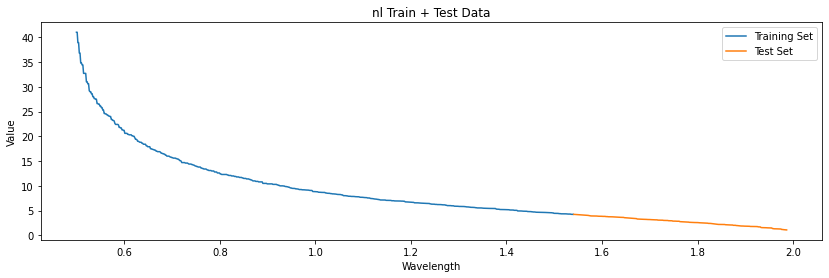

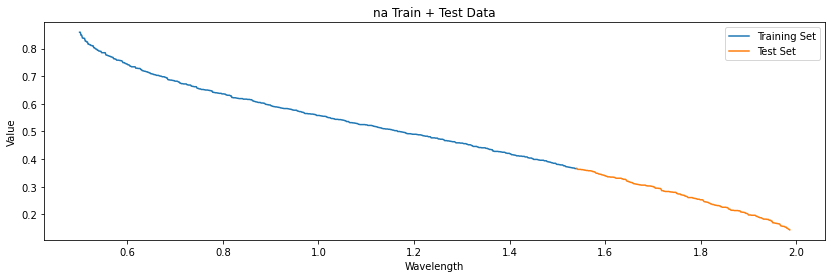

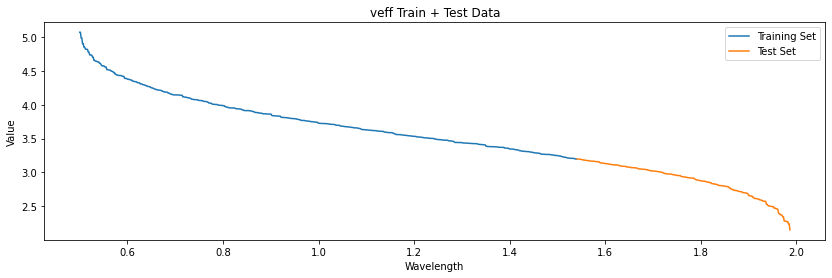

In [7]:
# Print training set and test set
for i in stockList:
    plt.figure(figsize=(14,4))
    plt.plot(df_new[i]["Train"])
    plt.plot(df_new[i]["Test"])
    plt.ylabel("Value")
    plt.xlabel("Wavelength")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Train + Test Data")

In [8]:
# Scaling the training set
# We rescale all stock price to zero for the lowest and 1 for the highest. Each of company have their own scale. We make another two dictionary which contain scaled price for each company. One contain train set and another contain test set.

# We also create another dictionary for collecting the scaller. This will be useful when we want to inverse transform our prediction.

transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(stockList):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(df_new[i]["Train"])
    a1 = np.array(df_new[i]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.fit_transform(a1)
    scaler[i] = sc
    
del a0
del a1

In [9]:
#print test and train shape for epoch operation
for i in transform_train.keys():
    print(i, transform_train[i].shape)
    train_shape= transform_train[i].shape[0]
    #print(train_shape)

print("\n")    
for i in transform_test.keys():
    print(i, transform_test[i].shape)
    test_shape= transform_test[i].shape[0]
    #print(train_shape)

neff (699, 1)
Aeff (699, 1)
disp (699, 1)
conf (699, 1)
bi (699, 1)
pf (699, 1)
eml (699, 1)
sc (699, 1)
bl (699, 1)
tx (699, 1)
rs (699, 1)
nl (699, 1)
na (699, 1)
veff (699, 1)


neff (300, 1)
Aeff (300, 1)
disp (300, 1)
conf (300, 1)
bi (300, 1)
pf (300, 1)
eml (300, 1)
sc (300, 1)
bl (300, 1)
tx (300, 1)
rs (300, 1)
nl (300, 1)
na (300, 1)
veff (300, 1)


In [10]:
# We think 60 feature will be enough training. We prepare shape our test and train set for neural network input


trainset = {}
testset = {}
features = 14
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(features,train_shape):   # (705, 1)
        X_train.append(transform_train[j][i-features:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(features, test_shape):    # shape  (301, 1)
        X_test.append(transform_test[j][i-features:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

In [11]:
# Check the shape (again) before start training
arr_buff = []
for i in stockList:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=stockList)

,X_train,y_train,X_test,y_test
neff,"(685, 14, 1)","(685,)","(286, 14, 1)","(286,)"
Aeff,"(685, 14, 1)","(685,)","(286, 14, 1)","(286,)"
disp,"(685, 14, 1)","(685,)","(286, 14, 1)","(286,)"
conf,"(685, 14, 1)","(685,)","(286, 14, 1)","(286,)"
bi,"(685, 14, 1)","(685,)","(286, 14, 1)","(286,)"
pf,"(685, 14, 1)","(685,)","(286, 14, 1)","(286,)"
eml,"(685, 14, 1)","(685,)","(286, 14, 1)","(286,)"
sc,"(685, 14, 1)","(685,)","(286, 14, 1)","(286,)"
bl,"(685, 14, 1)","(685,)","(286, 14, 1)","(286,)"
tx,"(685, 14, 1)","(685,)","(286, 14, 1)","(286,)"


In [12]:
######################################### LSTM archietecture (just uncomment to run)
# %%time
# # The LSTM architecture
# regressor = Sequential()
# # First LSTM layer with Dropout regularisation
# regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
# regressor.add(Dropout(0.2))
# # Second LSTM layer
# regressor.add(LSTM(units=50, return_sequences=True))
# regressor.add(Dropout(0.2))
# # Third LSTM layer
# regressor.add(LSTM(units=50, return_sequences=True))
# regressor.add(Dropout(0.5))
# # Fourth LSTM layer
# regressor.add(LSTM(units=50))
# regressor.add(Dropout(0.5))
# # The output layer
# regressor.add(Dense(units=1))

# # Compiling the RNN
# regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# # Fitting to the training set
# for i in stockList:
#     print("Fitting to", i)
#     regressor.fit(trainset[i]["X"], trainset[i]["y"], epochs=10, batch_size=200)


#---------------------------------------------------
############################################################################## The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.001, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
for i in stockList:
    print("Fitting to", i)
    regressorGRU.fit(trainset[i]["X"], trainset[i]["y"],epochs=100,batch_size=150)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Fitting to neff
Epoch 1/100
5/5 [==============================] - 7s 61ms/step - loss: 0.2994
Epoch 2/100
5/5 [==============================] - 0s 60ms/step - loss: 0.1708
Epoch 3/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0674
Epoch 4/100
5/5 [==============================] - 0s 58ms/step - loss: 0.0496
Epoch 5/100
5/5 [==============================] - 0s 59ms/step - loss: 0.0629
Epoch 6/100
5/5 [==============================] - 0s 56ms/step - loss: 0.0602
Epoch 7/100
5/5 [==============================] - 0s 57ms/step - loss: 0.0501
Epoch 8/100
5/5 [==============================] - 0s 57ms/step - loss: 0.0428
Epoch 9/100
5/5 [==============================] - 0s 57ms/step - loss: 0.0401
Epoch 10/100
5/5 [==============================] - 0s 59ms/step - loss: 0.0435
Epoch 11/100
5/5 [==============================] - 0s 58ms/step - loss: 0.0387
Epoch 12/100
5/5 [==============================] - 0s 57ms/step - loss: 0.0367
Epoch 13/100
5/5 [===============

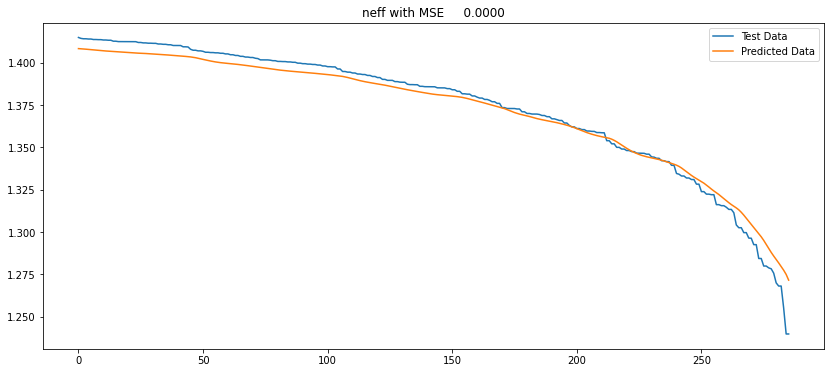

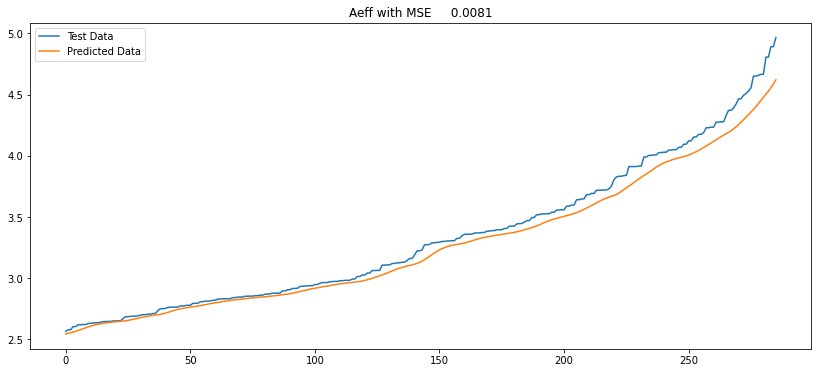

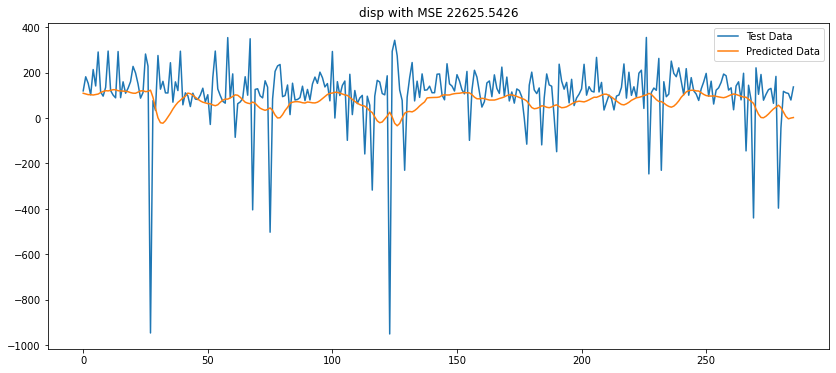

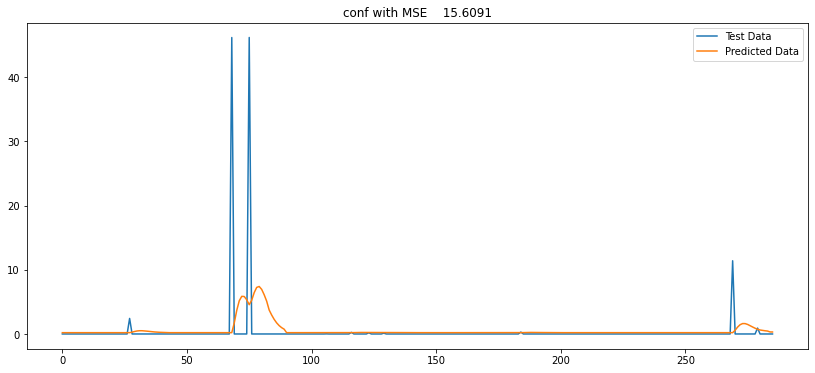

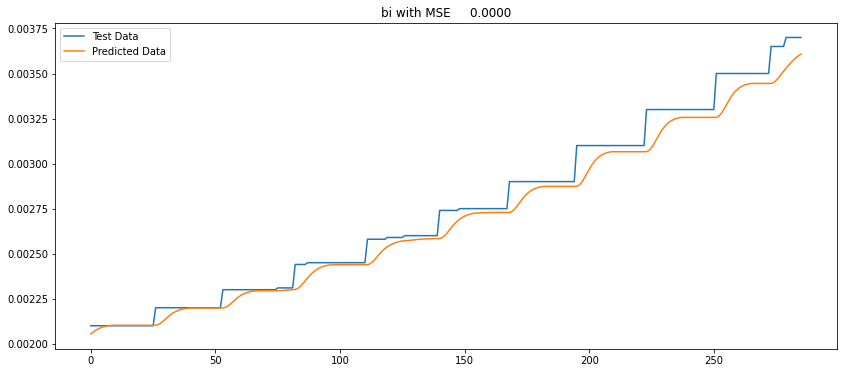

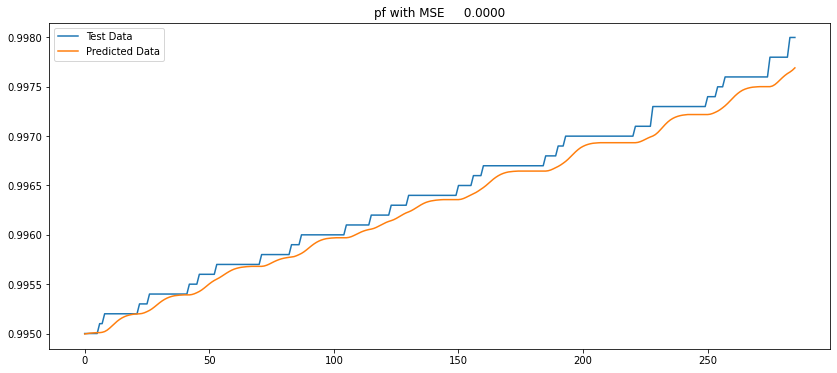

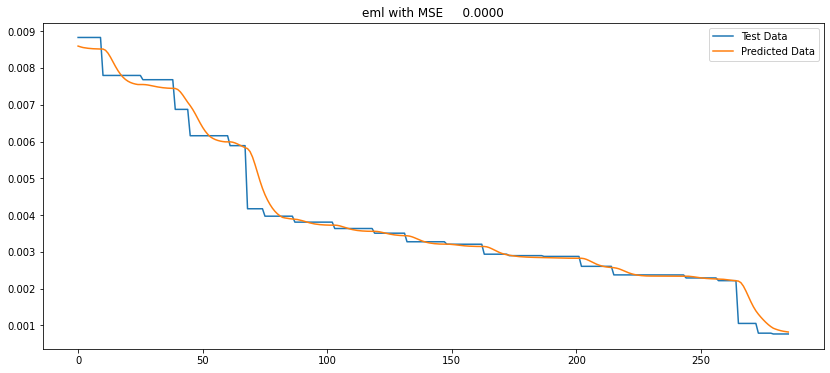

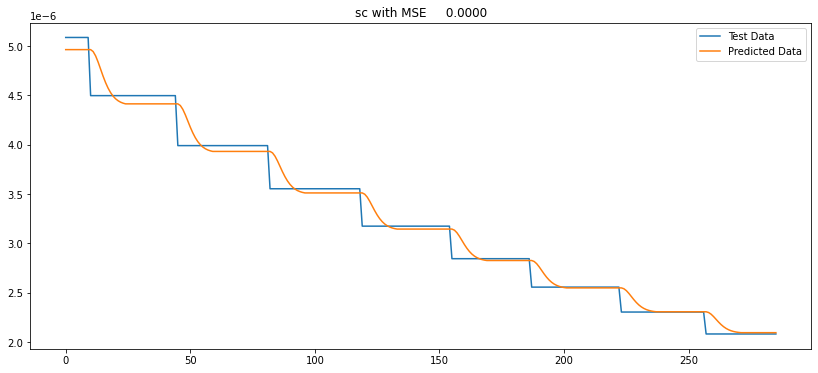

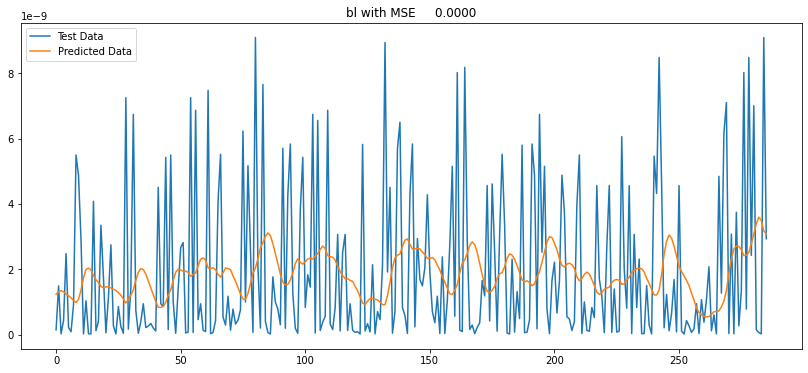

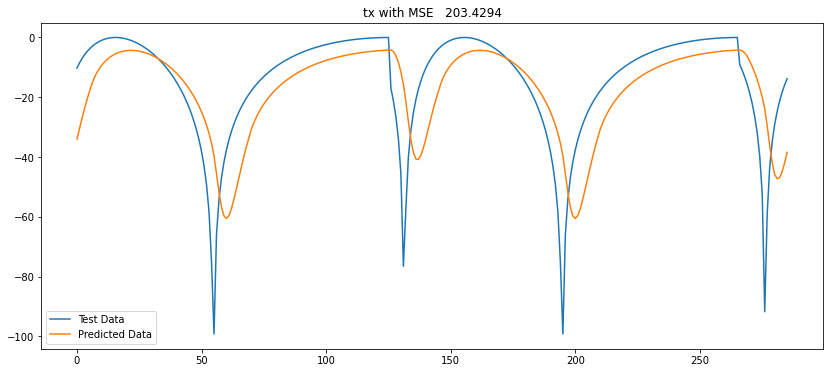

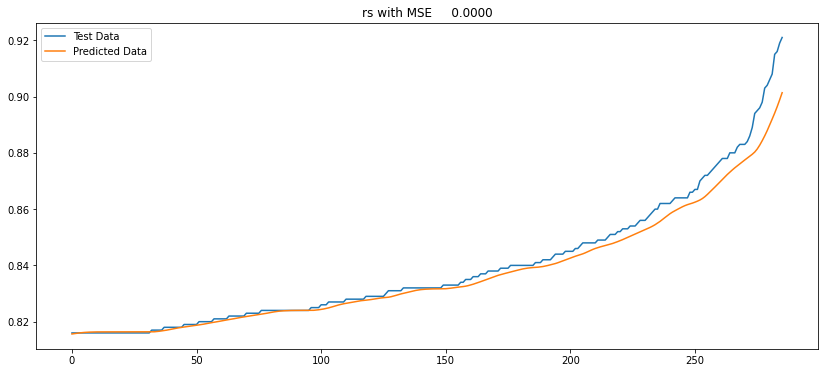

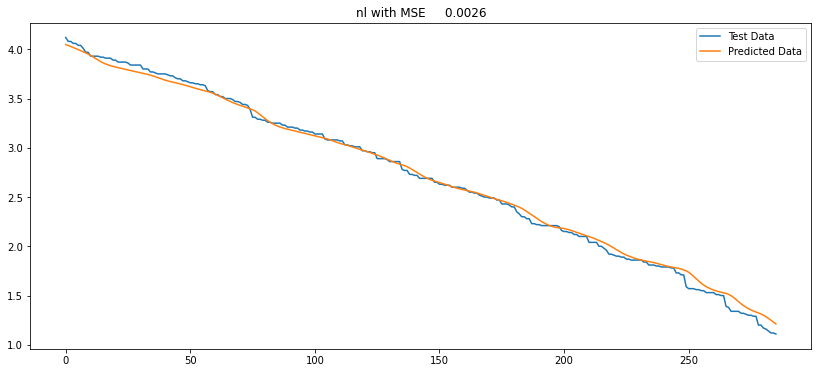

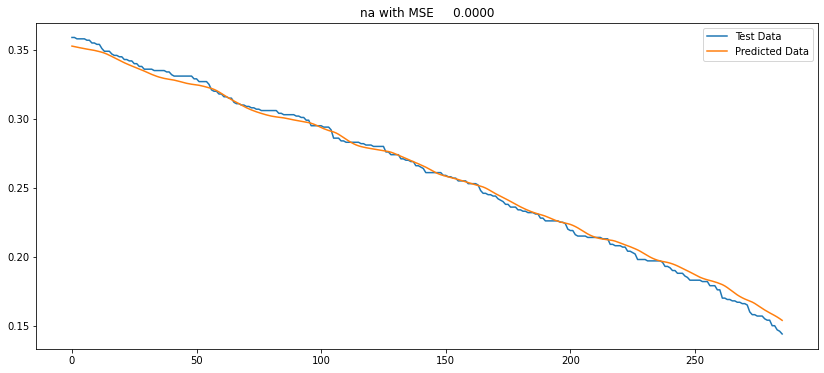

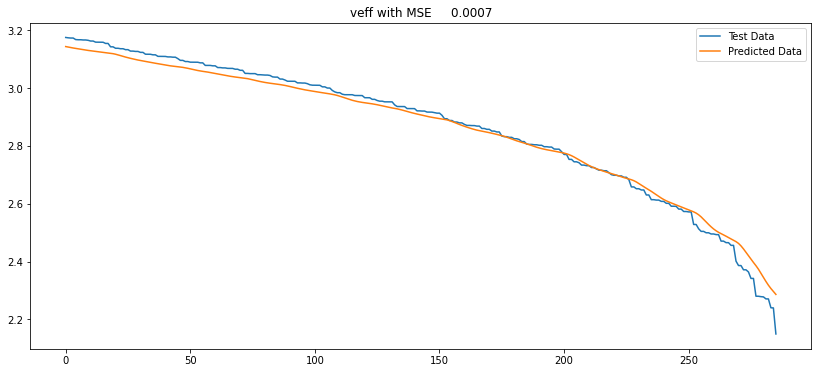

In [13]:
# Truth be told. That's one awesome score.

# LSTM is not the only kind of unit that has taken the world of Deep Learning by a storm. We have Gated Recurrent Units(GRU). It's not known, which is better: GRU or LSTM becuase they have comparable performances. GRUs are easier to train than LSTMs.
# In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

############################################## Plot LSTM fitting
# pred_result = {}
# for i in stockList:
#     y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
#     y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"]))
#     MSE = mean_squared_error(y_true, y_pred)
#     pred_result[i] = {}
#     pred_result[i]["True"] = y_true
#     pred_result[i]["Pred"] = y_pred
    
#     plt.figure(figsize=(14,6))
#     plt.title("{} with MSE {:10.4f}".format(i,MSE))
#     plt.plot(y_true)
#     plt.plot(y_pred)

# for i in stockList:
#     y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
#     y_pred = scaler[i].inverse_transform(regressorGRU.predict(testset[i]["X"]))
#     MSE = mean_squared_error(y_true, y_pred)
    
#     plt.figure(figsize=(14,6))
#     plt.title("{} with MSE {:10.4f}".format(i,MSE))
#     plt.plot(y_true)
#     plt.plot(y_pred)

############################################## Plot GRU fitting
pred_result = {}
for i in stockList:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(regressorGRU.predict(testset[i]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)
    plt.legend(["Test Data", "Predicted Data"])

Prediction without Lag, neff MSE     0.0000
Prediction with Lag 5, neff MSE     0.0000
Prediction without Lag, Aeff MSE     0.0081
Prediction with Lag 5, Aeff MSE     0.0015
Prediction without Lag, disp MSE 22625.5426
Prediction with Lag 5, disp MSE 19632.7684
Prediction without Lag, conf MSE    15.6091
Prediction with Lag 5, conf MSE    13.1365
Prediction without Lag, bi MSE     0.0000
Prediction with Lag 5, bi MSE     0.0000
Prediction without Lag, pf MSE     0.0000
Prediction with Lag 5, pf MSE     0.0000
Prediction without Lag, eml MSE     0.0000
Prediction with Lag 5, eml MSE     0.0000
Prediction without Lag, sc MSE     0.0000
Prediction with Lag 5, sc MSE     0.0000
Prediction without Lag, bl MSE     0.0000
Prediction with Lag 5, bl MSE     0.0000
Prediction without Lag, tx MSE   203.4294
Prediction with Lag 5, tx MSE    46.1820
Prediction without Lag, rs MSE     0.0000
Prediction with Lag 5, rs MSE     0.0000
Prediction without Lag, nl MSE     0.0026
Prediction with Lag 5, nl M

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

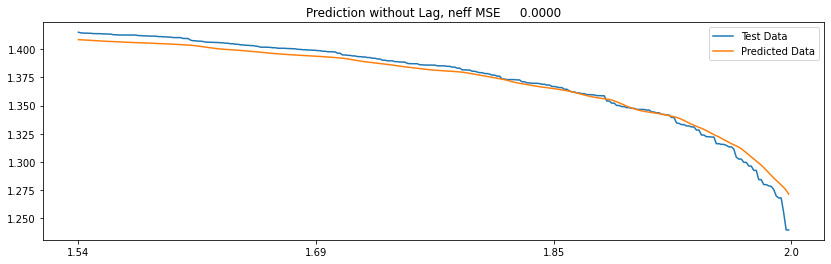

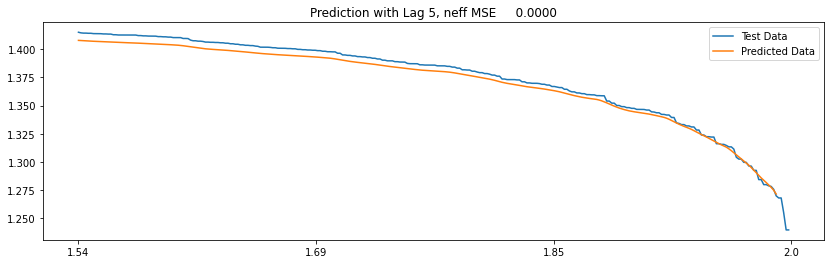

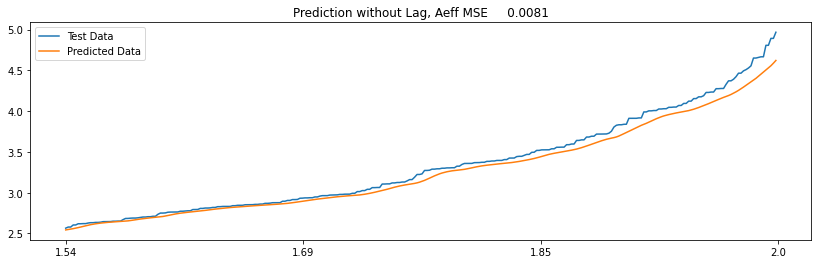

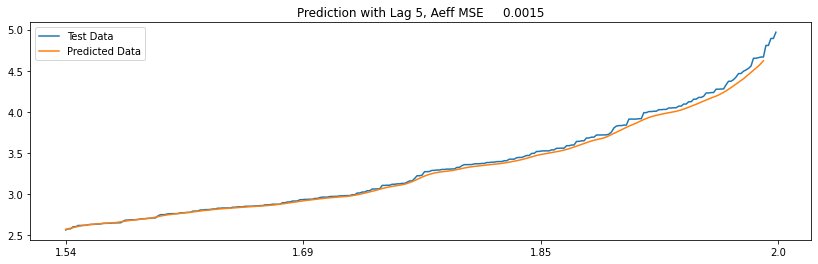

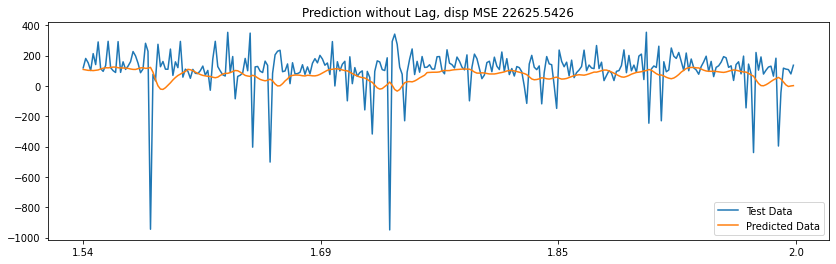

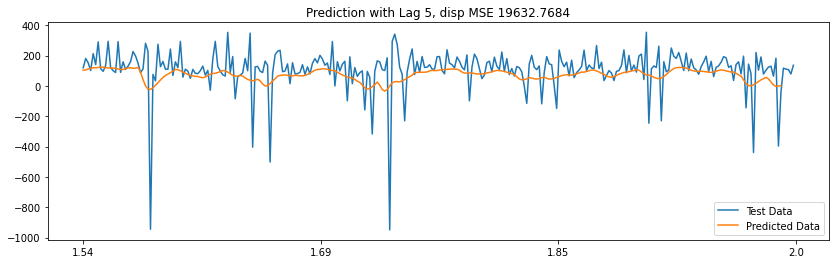

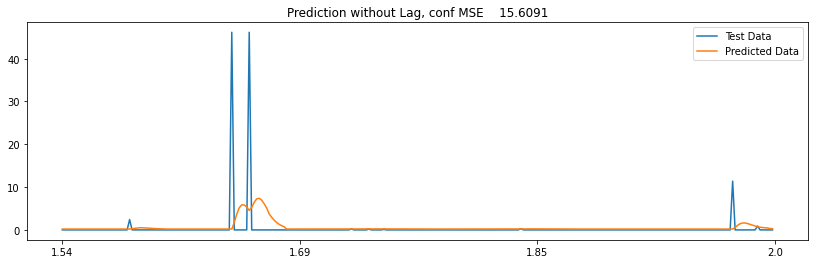

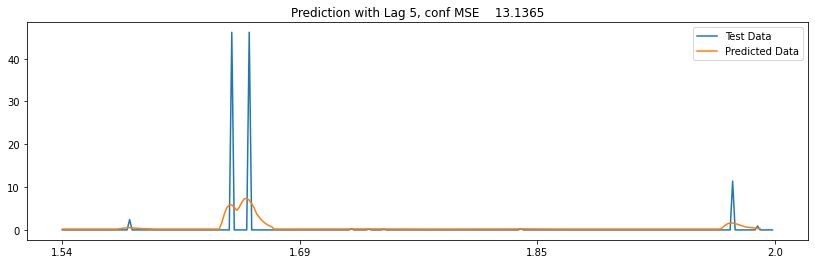

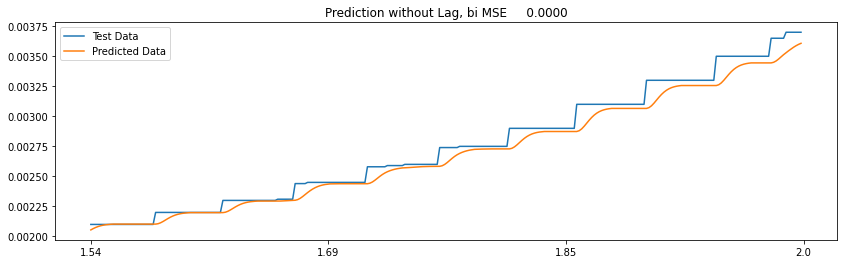

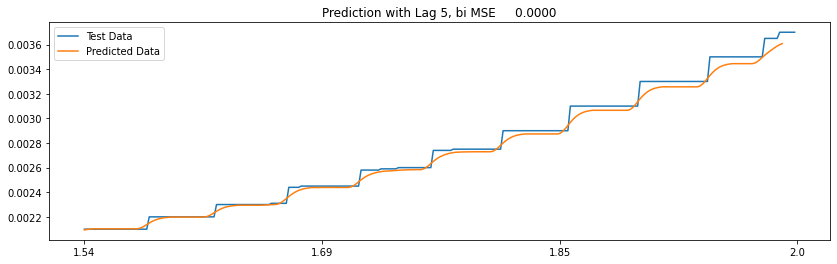

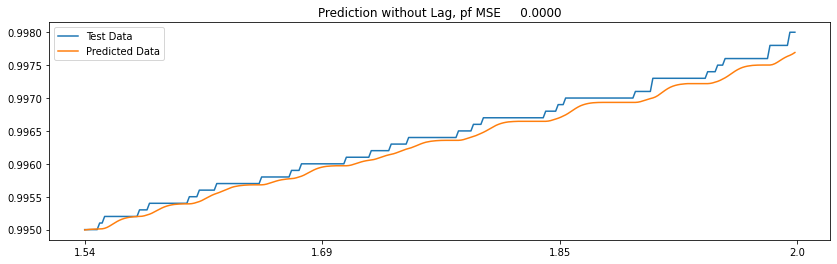

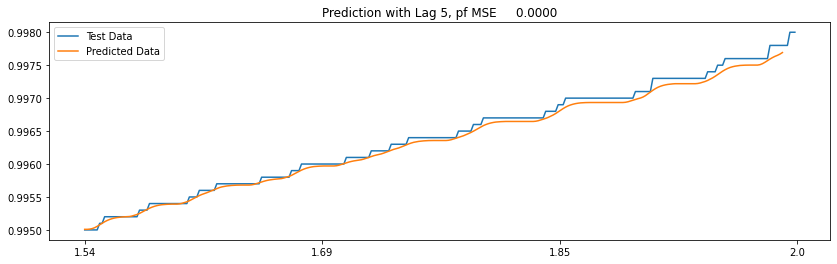

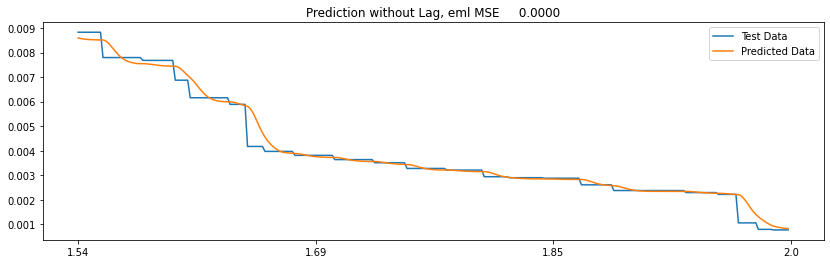

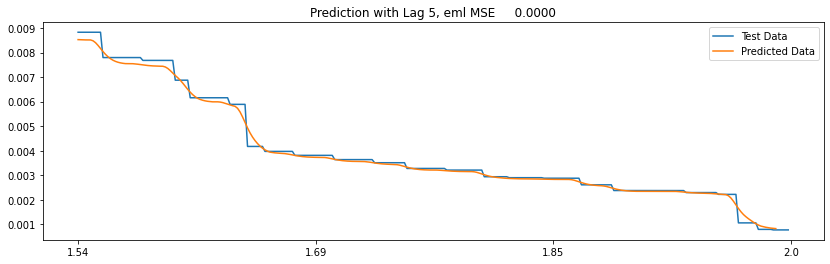

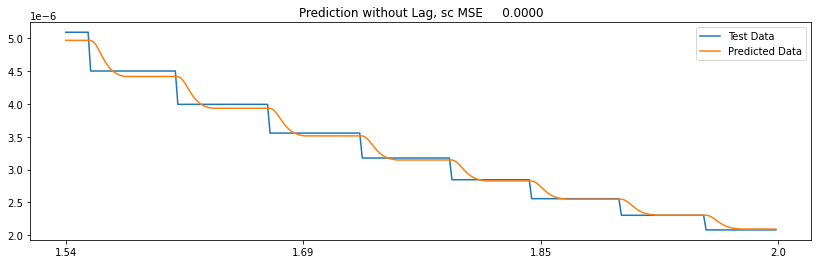

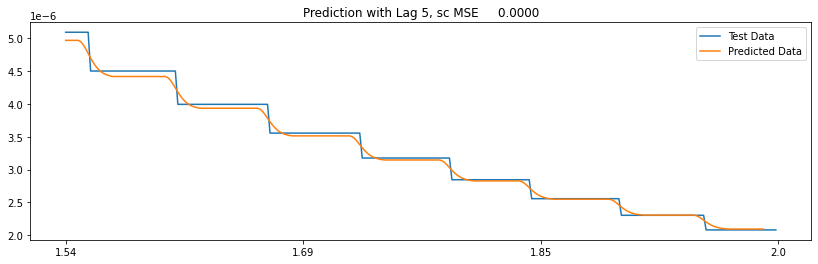

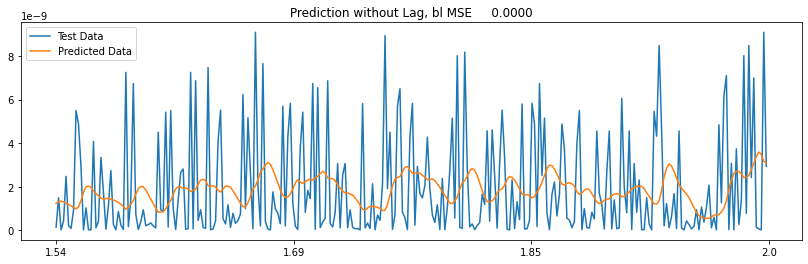

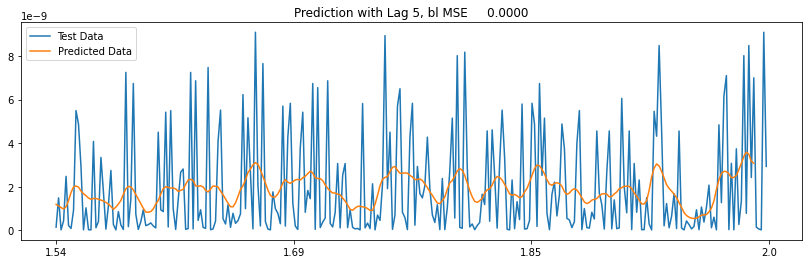

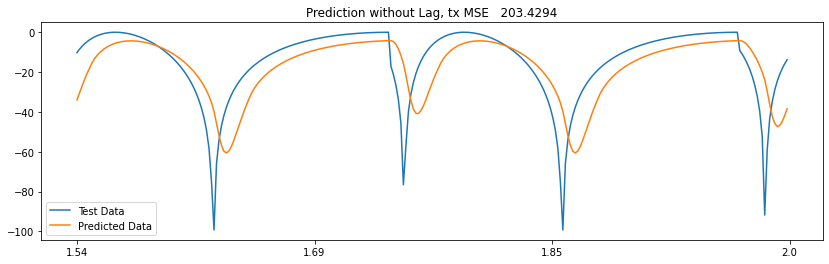

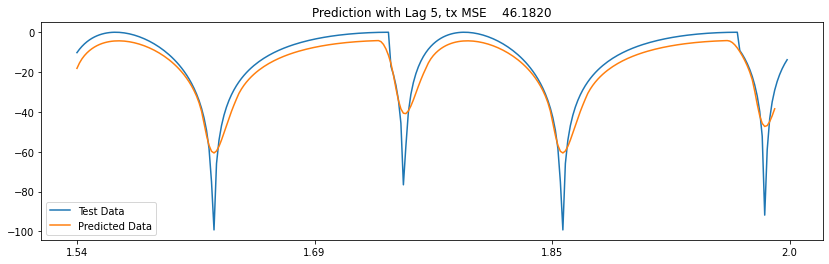

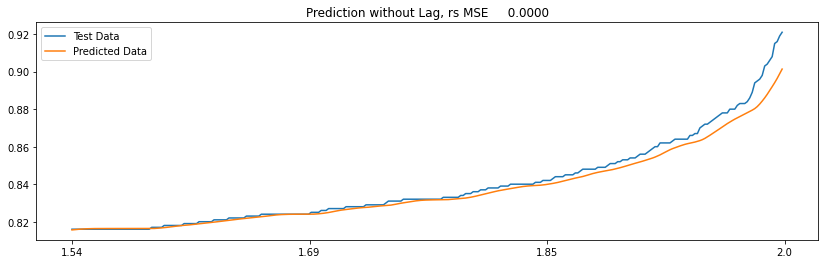

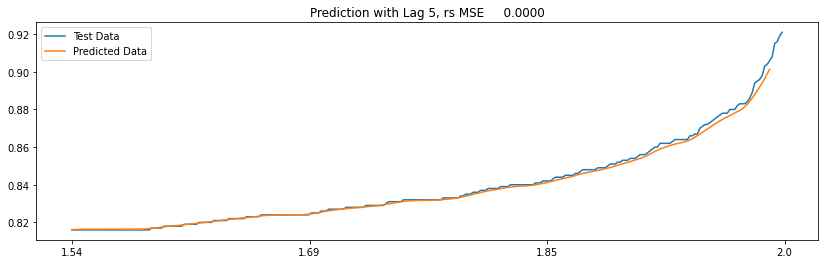

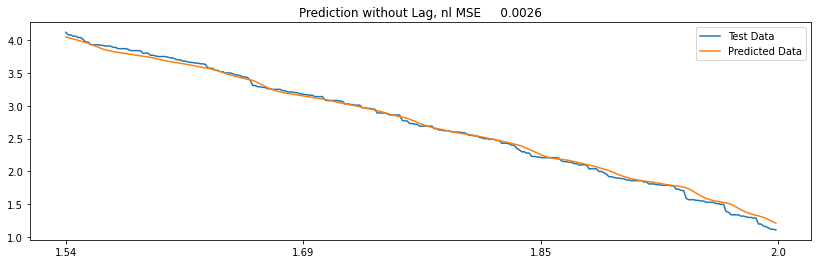

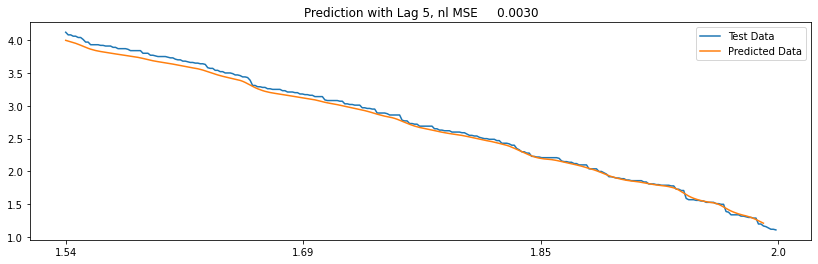

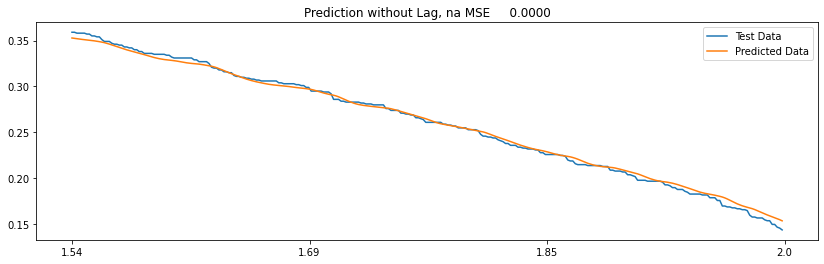

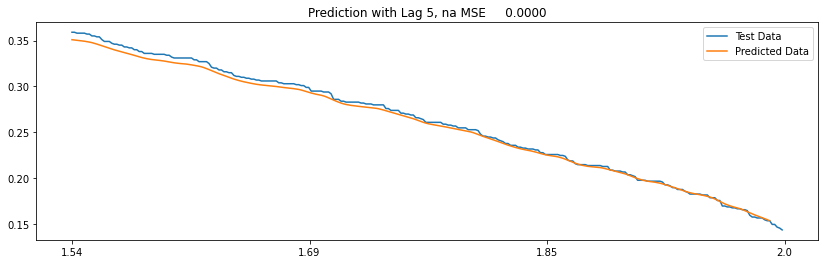

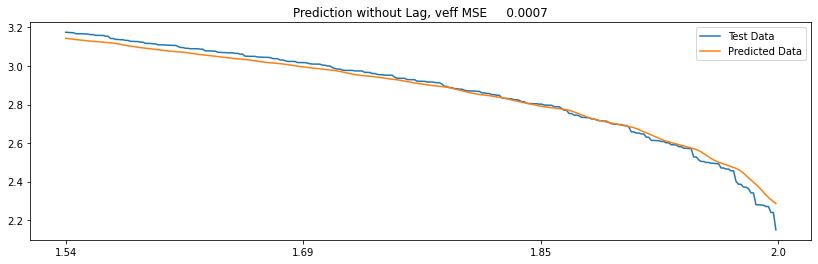

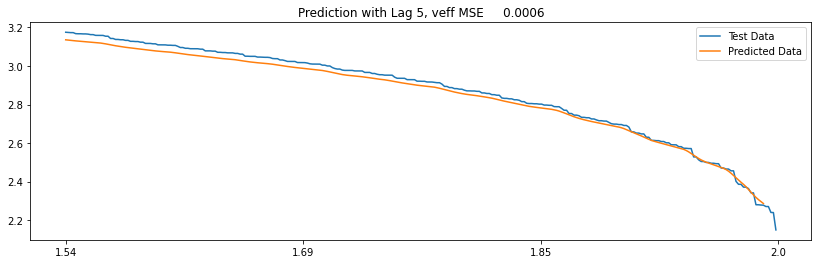

In [14]:
# We can improve our prediction by introducing shifting/lagging. Essentialy we slide our prediction for a period of time. This is a common practice in signal processing subfield.

# When we displace to make our prediction start earlier, we call it lagging. As for consequences, lagged prediction will have last -- equal to how much we displace the prediction -- value equal to NaN. If we lag it by 5 day, then the last 5 day prediction will become NaN.

# When we displace to make our prediction start later, we call it shifting. As for consequenceses, shifted prediction will have first -- equal to how much we displace the prediction -- value equal to NaN. If we shift it by 5 day, then the last 5 day prediction will become NaN.


time_index = 0

def lagging(df, lag, time_index):
    df_pred = pd.Series(df["Pred"].reshape(-1), copy=False)
    df_true = pd.Series(df["True"].reshape(-1), copy=False)
    
    df_pred_lag = df_pred.shift(lag)
    
    print("Prediction without Lag, {} MSE {:10.4f}".format(i,mean_squared_error(np.array(df_true), np.array(df_pred))))
    print("Prediction with Lag 5, {} MSE {:10.4f}".format(i,mean_squared_error(np.array(df_true[:-5]), np.array(df_pred_lag[:-5]))))

    plt.figure(figsize=(14,4))
    plt.title("Prediction without Lag, {} MSE {:10.4f}".format(i,mean_squared_error(np.array(df_true), np.array(df_pred))))
    plt.plot(df_true)
    plt.plot(df_pred)
    plt1  = test_shape-features
    positions = (0, plt1/3, plt1*2/3, plt1)
 
    labels = (split_point, str(round(split_point+(2-split_point)/3, 2)), str(round(split_point+2*(2-split_point)/3, 2)), "2.0")
    plt.xticks(positions, labels)
    plt.legend(["Test Data", "Predicted Data"])

    MSE_lag = mean_squared_error(np.array(df_true[:-5]), np.array(df_pred_lag[:-5]))
    plt.figure(figsize=(14,4))
    plt.title("Prediction with Lag 5, {} MSE {:10.4f}".format(i,mean_squared_error(np.array(df_true[:-5]), np.array(df_pred_lag[:-5]))))
    plt.plot(df_true)
    plt.plot(df_pred_lag)
    positions = (0, plt1/3, plt1*2/3, plt1)
    #labels = (split_point, "1.0", "1.5", "2.0")
    labels = (split_point, str(round(split_point+(2-split_point)/3, 2)), str(round(split_point+2*(2-split_point)/3, 2)), "2.0")
    plt.xticks(positions, labels)
    plt.legend(["Test Data", "Predicted Data"])


for i in stockList:
    time_index = df_new[i]["Test"][features:].index
    #print(time_index)
    #time_index = time_index[features:]
    lagging(pred_result[i], -5, time_index)

In [15]:
import pandas as pd 
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

import matplotlib.pyplot as plt 
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [16]:
def split(dataframe, border):
    return dataframe[:border], dataframe[border:]

In [17]:
def Arima(dataset_ex_df,s):


  #data_FT = dataset_ex_df


  series = dataset_ex_df[s]
  #series = data_FT[s]
  model = ARIMA(series, order=(5, 1, 0))
  model_fit = model.fit(disp=0)
  print(model_fit.summary())





  X = series.values

  size = int(len(X) * 0.70) # 1.54

  train, test = X[0:size], X[size:len(X)]
  history = [x for x in train]
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
  error = mean_squared_error(test, predictions)
  print('Test MSE: %.3f' % error)


  # Plot the predicted (from ARIMA) and real prices

  plt.figure(figsize=(12, 6), dpi=100)
  plt1  = test_shape-features
  positions = (0, plt1/3, plt1*2/3, plt1)
  labels = (split_point, str(round(split_point+(2-split_point)/3, 2)), str(round(split_point+2*(2-split_point)/3, 2)), "2.0")
  plt.xticks(positions, labels)
  #plt.legend(["Test Data", "Predicted Data"])
  plt.plot(test, label='Test Data')
  plt.plot(predictions, color='red', label='Predicted Data')
  plt.xlabel('Wavelength')
  plt.ylabel(s)
  plt.title('Figure 5: ARIMA model on GS stock')
  plt.legend()
  plt.show()



{'neff':             y_train
wavelength         
0.500000    1.46532
0.501490    1.46532
0.502979    1.46495
0.504469    1.46495
0.505958    1.46453
...             ...
1.980636    1.26808
1.982125    1.26808
1.983615    1.25511
1.985104    1.23975
1.986594    1.23975

[999 rows x 1 columns]}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.y_train   No. Observations:                  998
Model:                 ARIMA(5, 1, 0)   Log Likelihood                5770.793
Method:                       css-mle   S.D. of innovations              0.001
Date:                Sat, 13 Nov 2021   AIC                         -11527.586
Time:                        16:17:08   BIC                         -11493.246
Sample:                             1   HQIC                        -11514.533
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0006      0.001     -1.096      0.273      -0.002       0.000
ar.L1.D.y_train     0.1141      0.033      3.503      0.000       0.050       0.178
ar.L2.D.y_train     0.0832      

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

Test MSE: 0.000


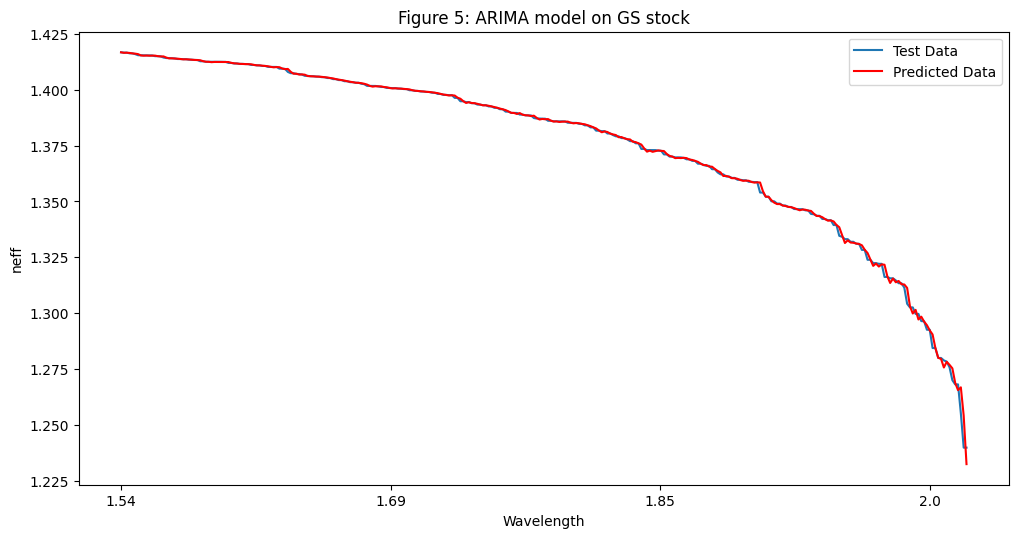

{'neff':             y_train
wavelength         
0.500000    1.46532
0.501490    1.46532
0.502979    1.46495
0.504469    1.46495
0.505958    1.46453
...             ...
1.980636    1.26808
1.982125    1.26808
1.983615    1.25511
1.985104    1.23975
1.986594    1.23975

[999 rows x 1 columns], 'Aeff':              y_train
wavelength          
0.500000    0.452362
0.501490    0.452362
0.502979    0.458466
0.504469    0.458466
0.505958    0.465207
...              ...
1.980636    4.807030
1.982125    4.807030
1.983615    4.891990
1.985104    4.892000
1.986594    4.967300

[999 rows x 1 columns]}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.y_train   No. Observations:                  998
Model:                 ARIMA(5, 1, 0)   Log Likelihood                3325.475
Method:                       css-mle   S.D. of innovations              0.009
Date:                Sat, 13 Nov 2021   AIC                          -6636.951
Time:                        16:19:35   BIC                          -6602.610
Sample:                             1   HQIC                         -6623.898
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0049      0.001      5.442      0.000       0.003       0.007
ar.L1.D.y_train    -0.0844      0.031     -2.736      0.006      -0.145      -0.024
ar.L2.D.y_train     0.2605      

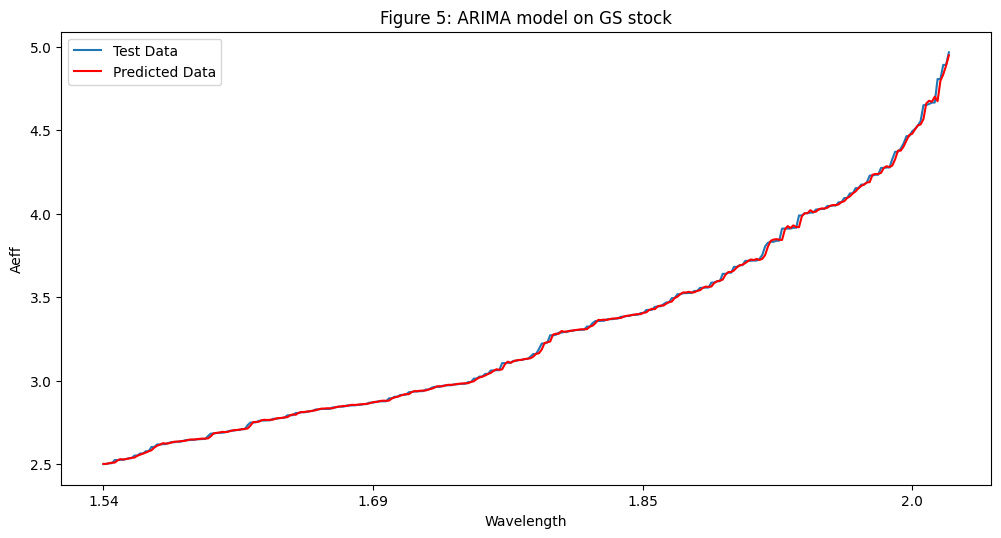

{'neff':             y_train
wavelength         
0.500000    1.46532
0.501490    1.46532
0.502979    1.46495
0.504469    1.46495
0.505958    1.46453
...             ...
1.980636    1.26808
1.982125    1.26808
1.983615    1.25511
1.985104    1.23975
1.986594    1.23975

[999 rows x 1 columns], 'Aeff':              y_train
wavelength          
0.500000    0.452362
0.501490    0.452362
0.502979    0.458466
0.504469    0.458466
0.505958    0.465207
...              ...
1.980636    4.807030
1.982125    4.807030
1.983615    4.891990
1.985104    4.892000
1.986594    4.967300

[999 rows x 1 columns], 'disp':              y_train
wavelength          
0.500000    190.0990
0.501490     81.4156
0.502979    111.5120
0.504469    184.8690
0.505958     96.1496
...              ...
1.980636    117.3690
1.982125    111.0920
1.983615    107.8850
1.985104     79.2511
1.986594    136.6690

[999 rows x 1 columns]}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.y_train   No. Observations:                  998
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6560.312
Method:                       css-mle   S.D. of innovations            173.122
Date:                Sat, 13 Nov 2021   AIC                          13134.623
Time:                        16:21:58   BIC                          13168.964
Sample:                             1   HQIC                         13147.676
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0298      1.570     -0.019      0.985      -3.108       3.048
ar.L1.D.y_train    -0.8161      0.031    -26.024      0.000      -0.878      -0.755
ar.L2.D.y_train    -0.6651      

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 23076.076


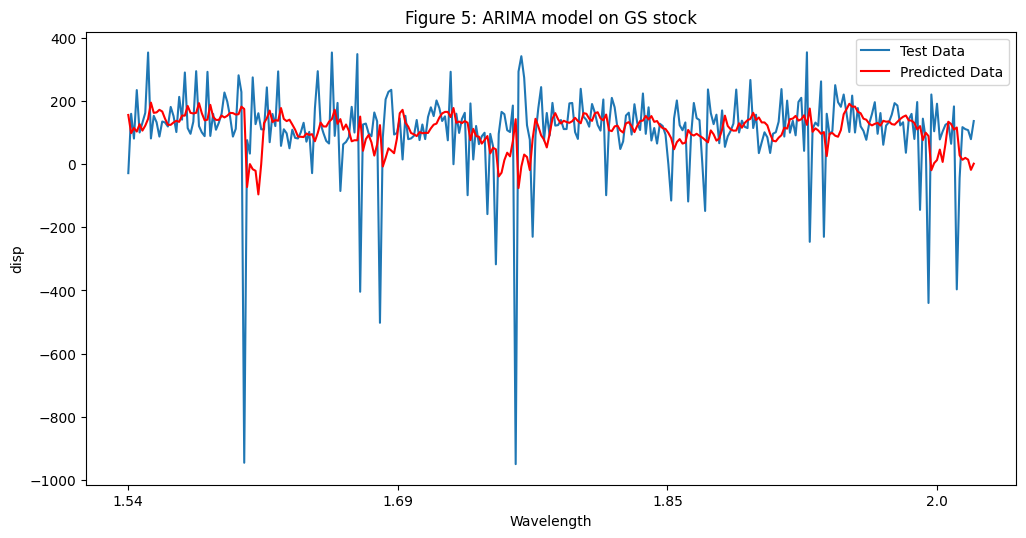

{'neff':             y_train
wavelength         
0.500000    1.46532
0.501490    1.46532
0.502979    1.46495
0.504469    1.46495
0.505958    1.46453
...             ...
1.980636    1.26808
1.982125    1.26808
1.983615    1.25511
1.985104    1.23975
1.986594    1.23975

[999 rows x 1 columns], 'Aeff':              y_train
wavelength          
0.500000    0.452362
0.501490    0.452362
0.502979    0.458466
0.504469    0.458466
0.505958    0.465207
...              ...
1.980636    4.807030
1.982125    4.807030
1.983615    4.891990
1.985104    4.892000
1.986594    4.967300

[999 rows x 1 columns], 'disp':              y_train
wavelength          
0.500000    190.0990
0.501490     81.4156
0.502979    111.5120
0.504469    184.8690
0.505958     96.1496
...              ...
1.980636    117.3690
1.982125    111.0920
1.983615    107.8850
1.985104     79.2511
1.986594    136.6690

[999 rows x 1 columns], 'conf':                  y_train
wavelength              
0.500000   -7.663180e-22
0.501490   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.y_train   No. Observations:                  998
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3661.833
Method:                       css-mle   S.D. of innovations              9.485
Date:                Sat, 13 Nov 2021   AIC                           7337.666
Time:                        16:24:58   BIC                           7372.007
Sample:                             1   HQIC                          7350.719
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.406e-08      0.086  -2.79e-07      1.000      -0.169       0.169
ar.L1.D.y_train    -0.8322      0.031    -26.669      0.000      -0.893      -0.771
ar.L2.D.y_train    -0.6652      

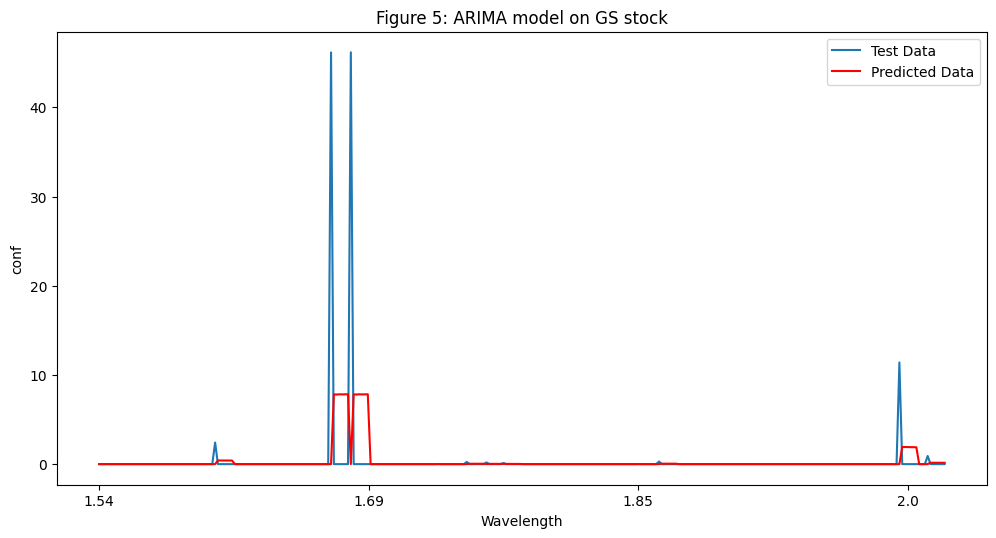

{'neff':             y_train
wavelength         
0.500000    1.46532
0.501490    1.46532
0.502979    1.46495
0.504469    1.46495
0.505958    1.46453
...             ...
1.980636    1.26808
1.982125    1.26808
1.983615    1.25511
1.985104    1.23975
1.986594    1.23975

[999 rows x 1 columns], 'Aeff':              y_train
wavelength          
0.500000    0.452362
0.501490    0.452362
0.502979    0.458466
0.504469    0.458466
0.505958    0.465207
...              ...
1.980636    4.807030
1.982125    4.807030
1.983615    4.891990
1.985104    4.892000
1.986594    4.967300

[999 rows x 1 columns], 'disp':              y_train
wavelength          
0.500000    190.0990
0.501490     81.4156
0.502979    111.5120
0.504469    184.8690
0.505958     96.1496
...              ...
1.980636    117.3690
1.982125    111.0920
1.983615    107.8850
1.985104     79.2511
1.986594    136.6690

[999 rows x 1 columns], 'conf':                  y_train
wavelength              
0.500000   -7.663180e-22
0.501490   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.y_train   No. Observations:                  998
Model:                 ARIMA(5, 1, 0)   Log Likelihood                9448.222
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sat, 13 Nov 2021   AIC                         -18882.444
Time:                        16:26:40   BIC                         -18848.103
Sample:                             1   HQIC                        -18869.391
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.305e-06   5.05e-07      6.547      0.000    2.32e-06    4.29e-06
ar.L1.D.y_train    -0.0354      0.032     -1.121      0.263      -0.097       0.027
ar.L2.D.y_train    -0.0355      

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

Test MSE: 0.000


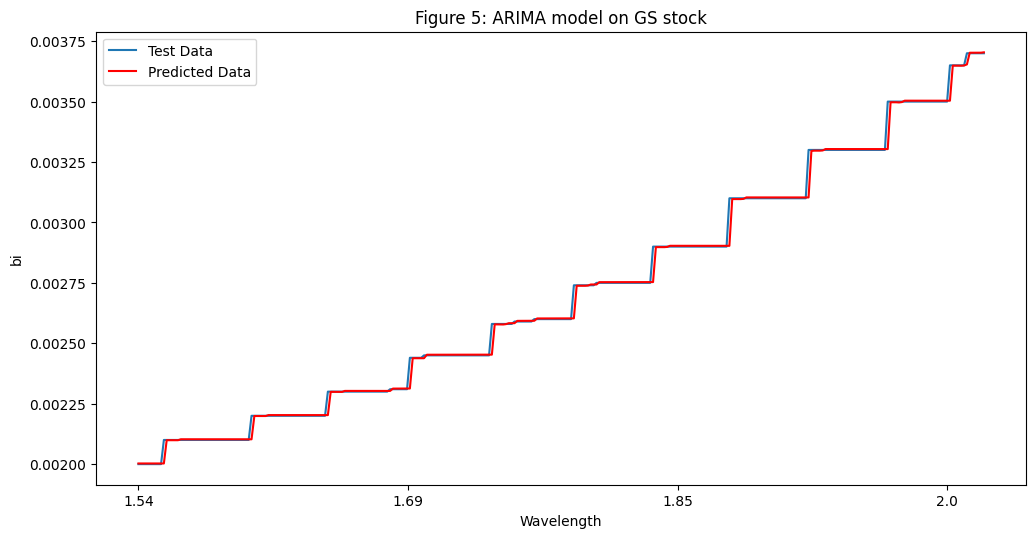

{'neff':             y_train
wavelength         
0.500000    1.46532
0.501490    1.46532
0.502979    1.46495
0.504469    1.46495
0.505958    1.46453
...             ...
1.980636    1.26808
1.982125    1.26808
1.983615    1.25511
1.985104    1.23975
1.986594    1.23975

[999 rows x 1 columns], 'Aeff':              y_train
wavelength          
0.500000    0.452362
0.501490    0.452362
0.502979    0.458466
0.504469    0.458466
0.505958    0.465207
...              ...
1.980636    4.807030
1.982125    4.807030
1.983615    4.891990
1.985104    4.892000
1.986594    4.967300

[999 rows x 1 columns], 'disp':              y_train
wavelength          
0.500000    190.0990
0.501490     81.4156
0.502979    111.5120
0.504469    184.8690
0.505958     96.1496
...              ...
1.980636    117.3690
1.982125    111.0920
1.983615    107.8850
1.985104     79.2511
1.986594    136.6690

[999 rows x 1 columns], 'conf':                  y_train
wavelength              
0.500000   -7.663180e-22
0.501490   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.y_train   No. Observations:                  998
Model:                 ARIMA(5, 1, 0)   Log Likelihood                7616.801
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sat, 13 Nov 2021   AIC                         -15219.601
Time:                        16:28:34   BIC                         -15185.261
Sample:                             1   HQIC                        -15206.549
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.675e-05   1.29e-05      2.856      0.004    1.15e-05     6.2e-05
ar.L1.D.y_train     0.1720      0.032      5.382      0.000       0.109       0.235
ar.L2.D.y_train     0.1933      

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

Test MSE: 0.000


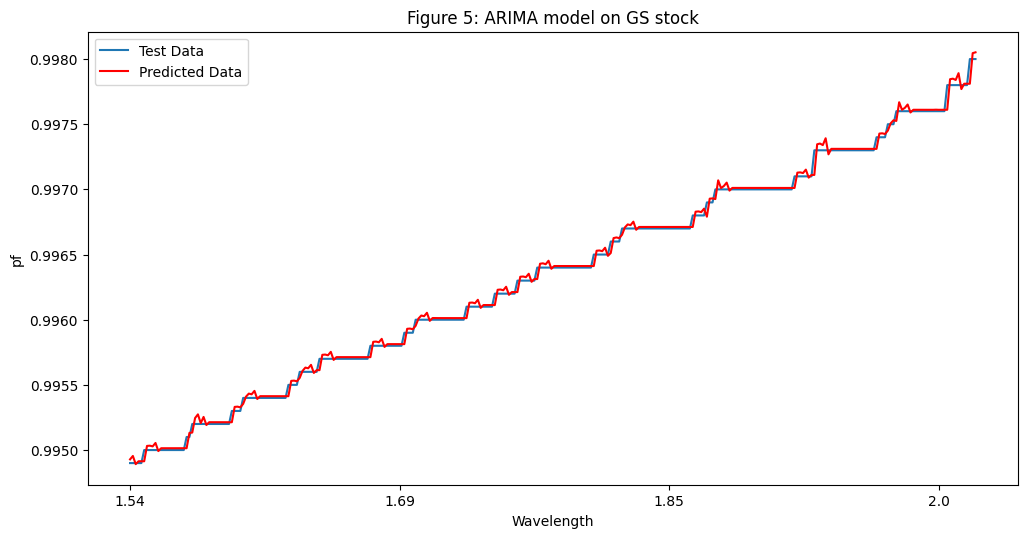

{'neff':             y_train
wavelength         
0.500000    1.46532
0.501490    1.46532
0.502979    1.46495
0.504469    1.46495
0.505958    1.46453
...             ...
1.980636    1.26808
1.982125    1.26808
1.983615    1.25511
1.985104    1.23975
1.986594    1.23975

[999 rows x 1 columns], 'Aeff':              y_train
wavelength          
0.500000    0.452362
0.501490    0.452362
0.502979    0.458466
0.504469    0.458466
0.505958    0.465207
...              ...
1.980636    4.807030
1.982125    4.807030
1.983615    4.891990
1.985104    4.892000
1.986594    4.967300

[999 rows x 1 columns], 'disp':              y_train
wavelength          
0.500000    190.0990
0.501490     81.4156
0.502979    111.5120
0.504469    184.8690
0.505958     96.1496
...              ...
1.980636    117.3690
1.982125    111.0920
1.983615    107.8850
1.985104     79.2511
1.986594    136.6690

[999 rows x 1 columns], 'conf':                  y_train
wavelength              
0.500000   -7.663180e-22
0.501490   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.y_train   No. Observations:                  998
Model:                 ARIMA(5, 1, 0)   Log Likelihood                3396.973
Method:                       css-mle   S.D. of innovations              0.008
Date:                Sat, 13 Nov 2021   AIC                          -6779.947
Time:                        16:34:37   BIC                          -6745.606
Sample:                             1   HQIC                         -6766.894
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0006      0.000     -2.580      0.010      -0.001      -0.000
ar.L1.D.y_train    -0.0064      0.032     -0.203      0.839      -0.068       0.056
ar.L2.D.y_train    -0.0064      

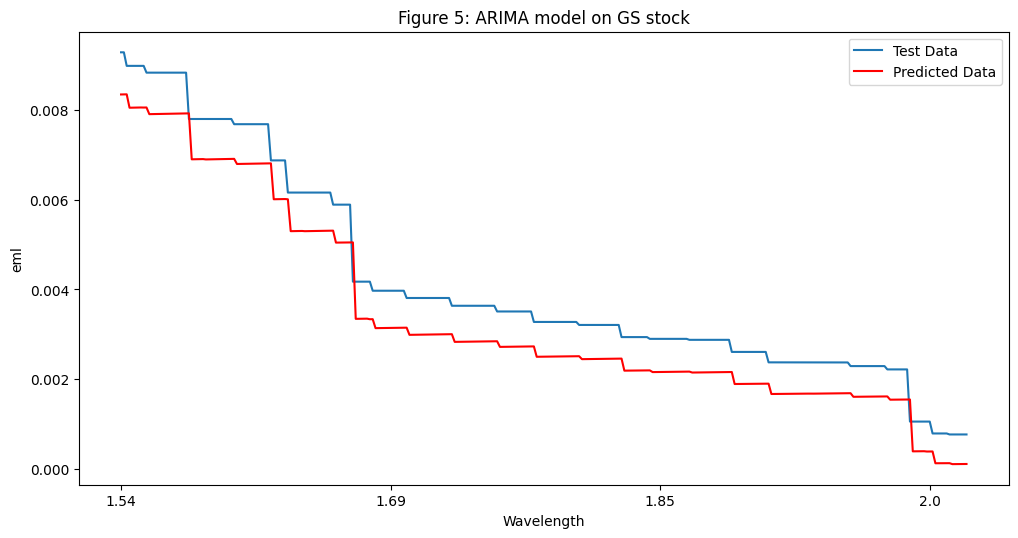

{'neff':             y_train
wavelength         
0.500000    1.46532
0.501490    1.46532
0.502979    1.46495
0.504469    1.46495
0.505958    1.46453
...             ...
1.980636    1.26808
1.982125    1.26808
1.983615    1.25511
1.985104    1.23975
1.986594    1.23975

[999 rows x 1 columns], 'Aeff':              y_train
wavelength          
0.500000    0.452362
0.501490    0.452362
0.502979    0.458466
0.504469    0.458466
0.505958    0.465207
...              ...
1.980636    4.807030
1.982125    4.807030
1.983615    4.891990
1.985104    4.892000
1.986594    4.967300

[999 rows x 1 columns], 'disp':              y_train
wavelength          
0.500000    190.0990
0.501490     81.4156
0.502979    111.5120
0.504469    184.8690
0.505958     96.1496
...              ...
1.980636    117.3690
1.982125    111.0920
1.983615    107.8850
1.985104     79.2511
1.986594    136.6690

[999 rows x 1 columns], 'conf':                  y_train
wavelength              
0.500000   -7.663180e-22
0.501490   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.y_train   No. Observations:                  998
Model:                 ARIMA(5, 1, 0)   Log Likelihood               11600.114
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sat, 13 Nov 2021   AIC                         -23186.228
Time:                        16:36:02   BIC                         -23151.887
Sample:                             1   HQIC                        -23173.175
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -1.86e-07   6.64e-08     -2.800      0.005   -3.16e-07   -5.58e-08
ar.L1.D.y_train    -0.0075      0.032     -0.238      0.812      -0.070       0.054
ar.L2.D.y_train    -0.0075      

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

Test MSE: 0.000


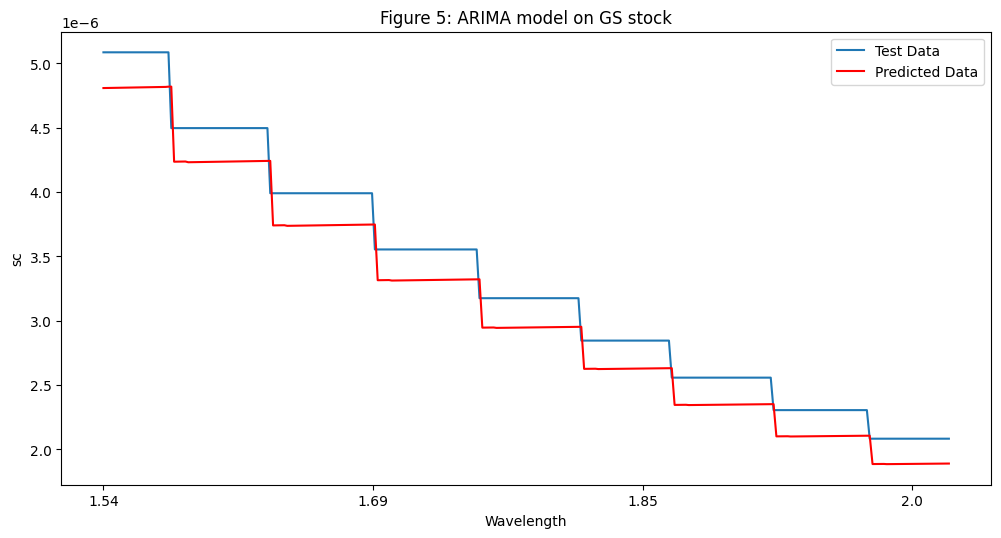

{'neff':             y_train
wavelength         
0.500000    1.46532
0.501490    1.46532
0.502979    1.46495
0.504469    1.46495
0.505958    1.46453
...             ...
1.980636    1.26808
1.982125    1.26808
1.983615    1.25511
1.985104    1.23975
1.986594    1.23975

[999 rows x 1 columns], 'Aeff':              y_train
wavelength          
0.500000    0.452362
0.501490    0.452362
0.502979    0.458466
0.504469    0.458466
0.505958    0.465207
...              ...
1.980636    4.807030
1.982125    4.807030
1.983615    4.891990
1.985104    4.892000
1.986594    4.967300

[999 rows x 1 columns], 'disp':              y_train
wavelength          
0.500000    190.0990
0.501490     81.4156
0.502979    111.5120
0.504469    184.8690
0.505958     96.1496
...              ...
1.980636    117.3690
1.982125    111.0920
1.983615    107.8850
1.985104     79.2511
1.986594    136.6690

[999 rows x 1 columns], 'conf':                  y_train
wavelength              
0.500000   -7.663180e-22
0.501490   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.y_train   No. Observations:                  998
Model:                 ARIMA(5, 1, 0)   Log Likelihood               18303.972
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sat, 13 Nov 2021   AIC                         -36593.943
Time:                        16:37:41   BIC                         -36559.603
Sample:                             1   HQIC                        -36580.890
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.419e-12   2.16e-08      0.000      1.000   -4.24e-08    4.24e-08
ar.L1.D.y_train    -0.8936      0.031    -28.762      0.000      -0.954      -0.833
ar.L2.D.y_train    -0.6842      

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

Test MSE: 0.000


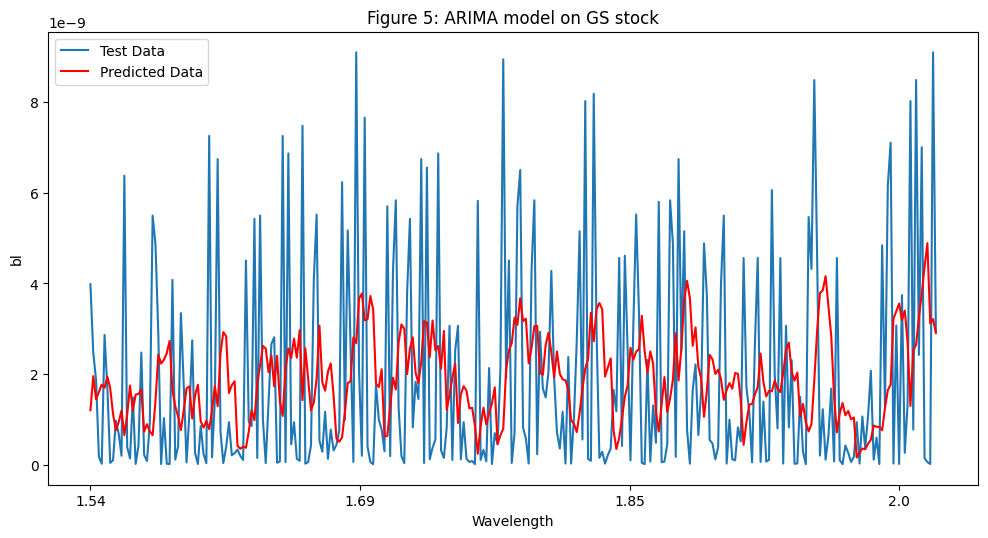

{'neff':             y_train
wavelength         
0.500000    1.46532
0.501490    1.46532
0.502979    1.46495
0.504469    1.46495
0.505958    1.46453
...             ...
1.980636    1.26808
1.982125    1.26808
1.983615    1.25511
1.985104    1.23975
1.986594    1.23975

[999 rows x 1 columns], 'Aeff':              y_train
wavelength          
0.500000    0.452362
0.501490    0.452362
0.502979    0.458466
0.504469    0.458466
0.505958    0.465207
...              ...
1.980636    4.807030
1.982125    4.807030
1.983615    4.891990
1.985104    4.892000
1.986594    4.967300

[999 rows x 1 columns], 'disp':              y_train
wavelength          
0.500000    190.0990
0.501490     81.4156
0.502979    111.5120
0.504469    184.8690
0.505958     96.1496
...              ...
1.980636    117.3690
1.982125    111.0920
1.983615    107.8850
1.985104     79.2511
1.986594    136.6690

[999 rows x 1 columns], 'conf':                  y_train
wavelength              
0.500000   -7.663180e-22
0.501490   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.y_train   No. Observations:                  998
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3744.149
Method:                       css-mle   S.D. of innovations             10.306
Date:                Sat, 13 Nov 2021   AIC                           7502.298
Time:                        16:40:38   BIC                           7536.638
Sample:                             1   HQIC                          7515.351
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0316      0.251      0.126      0.900      -0.461       0.524
ar.L1.D.y_train    -0.1536      0.032     -4.855      0.000      -0.216      -0.092
ar.L2.D.y_train    -0.0545      

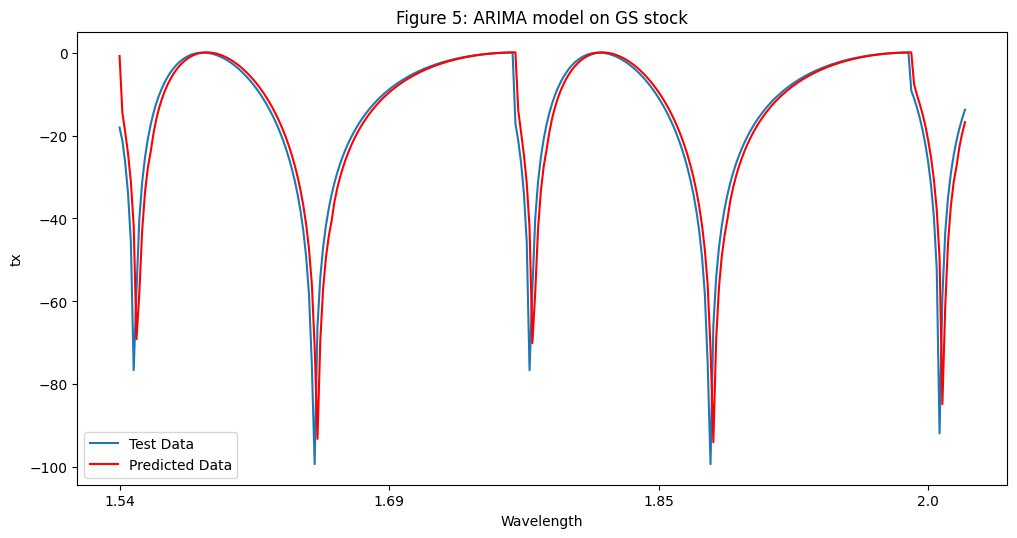

{'neff':             y_train
wavelength         
0.500000    1.46532
0.501490    1.46532
0.502979    1.46495
0.504469    1.46495
0.505958    1.46453
...             ...
1.980636    1.26808
1.982125    1.26808
1.983615    1.25511
1.985104    1.23975
1.986594    1.23975

[999 rows x 1 columns], 'Aeff':              y_train
wavelength          
0.500000    0.452362
0.501490    0.452362
0.502979    0.458466
0.504469    0.458466
0.505958    0.465207
...              ...
1.980636    4.807030
1.982125    4.807030
1.983615    4.891990
1.985104    4.892000
1.986594    4.967300

[999 rows x 1 columns], 'disp':              y_train
wavelength          
0.500000    190.0990
0.501490     81.4156
0.502979    111.5120
0.504469    184.8690
0.505958     96.1496
...              ...
1.980636    117.3690
1.982125    111.0920
1.983615    107.8850
1.985104     79.2511
1.986594    136.6690

[999 rows x 1 columns], 'conf':                  y_train
wavelength              
0.500000   -7.663180e-22
0.501490   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.y_train   No. Observations:                  998
Model:                 ARIMA(5, 1, 0)   Log Likelihood                6176.549
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sat, 13 Nov 2021   AIC                         -12339.099
Time:                        16:41:44   BIC                         -12304.758
Sample:                             1   HQIC                        -12326.046
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0002   6.35e-05      3.788      0.000       0.000       0.000
ar.L1.D.y_train     0.0700      0.031      2.223      0.026       0.008       0.132
ar.L2.D.y_train     0.1114      

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

Test MSE: 0.000


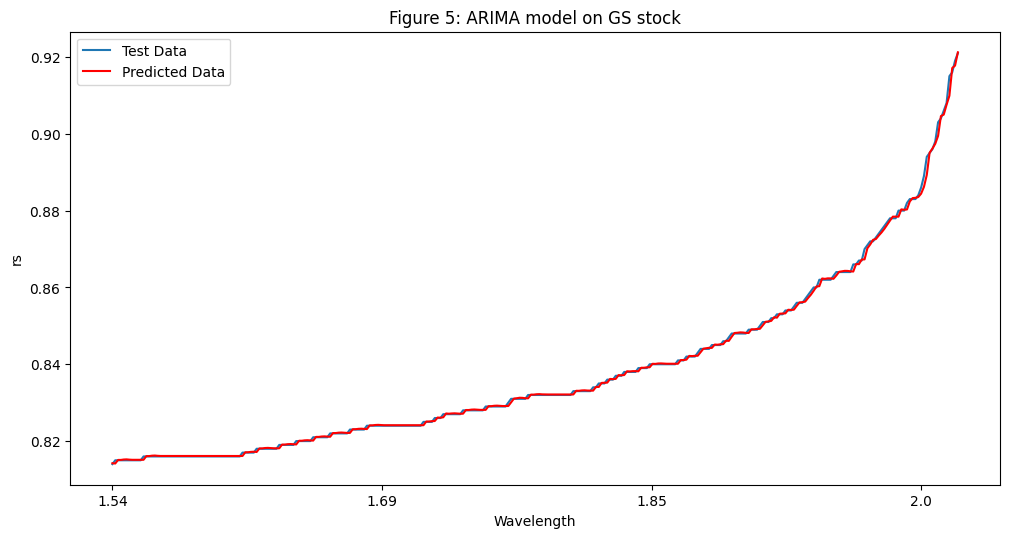

{'neff':             y_train
wavelength         
0.500000    1.46532
0.501490    1.46532
0.502979    1.46495
0.504469    1.46495
0.505958    1.46453
...             ...
1.980636    1.26808
1.982125    1.26808
1.983615    1.25511
1.985104    1.23975
1.986594    1.23975

[999 rows x 1 columns], 'Aeff':              y_train
wavelength          
0.500000    0.452362
0.501490    0.452362
0.502979    0.458466
0.504469    0.458466
0.505958    0.465207
...              ...
1.980636    4.807030
1.982125    4.807030
1.983615    4.891990
1.985104    4.892000
1.986594    4.967300

[999 rows x 1 columns], 'disp':              y_train
wavelength          
0.500000    190.0990
0.501490     81.4156
0.502979    111.5120
0.504469    184.8690
0.505958     96.1496
...              ...
1.980636    117.3690
1.982125    111.0920
1.983615    107.8850
1.985104     79.2511
1.986594    136.6690

[999 rows x 1 columns], 'conf':                  y_train
wavelength              
0.500000   -7.663180e-22
0.501490   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.y_train   No. Observations:                  998
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 901.481
Method:                       css-mle   S.D. of innovations              0.098
Date:                Sat, 13 Nov 2021   AIC                          -1788.961
Time:                        16:44:00   BIC                          -1754.621
Sample:                             1   HQIC                         -1775.908
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3069      0.336     -0.912      0.362      -0.966       0.352
ar.L1.D.y_train    -0.1503      0.031     -4.801      0.000      -0.212      -0.089
ar.L2.D.y_train     0.2434      

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 0.000


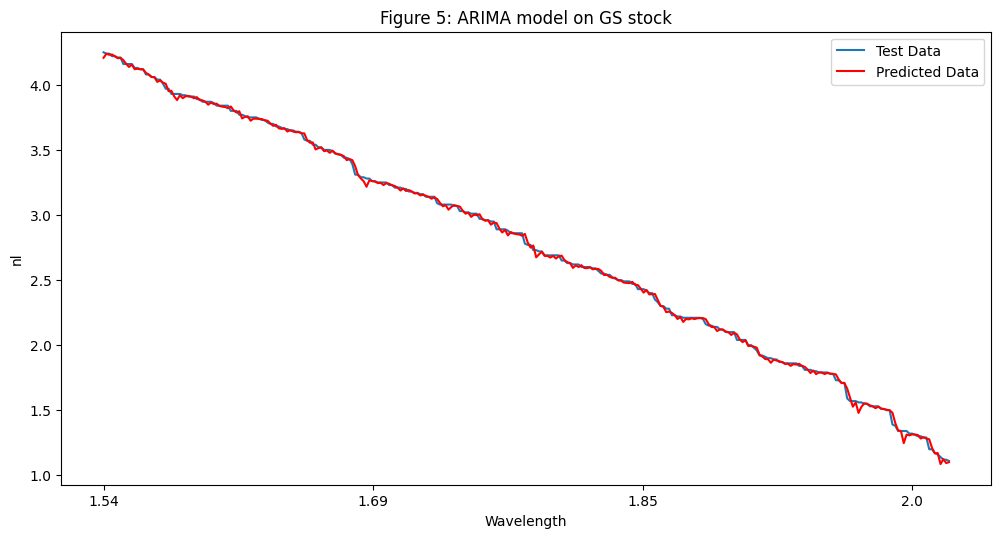

{'neff':             y_train
wavelength         
0.500000    1.46532
0.501490    1.46532
0.502979    1.46495
0.504469    1.46495
0.505958    1.46453
...             ...
1.980636    1.26808
1.982125    1.26808
1.983615    1.25511
1.985104    1.23975
1.986594    1.23975

[999 rows x 1 columns], 'Aeff':              y_train
wavelength          
0.500000    0.452362
0.501490    0.452362
0.502979    0.458466
0.504469    0.458466
0.505958    0.465207
...              ...
1.980636    4.807030
1.982125    4.807030
1.983615    4.891990
1.985104    4.892000
1.986594    4.967300

[999 rows x 1 columns], 'disp':              y_train
wavelength          
0.500000    190.0990
0.501490     81.4156
0.502979    111.5120
0.504469    184.8690
0.505958     96.1496
...              ...
1.980636    117.3690
1.982125    111.0920
1.983615    107.8850
1.985104     79.2511
1.986594    136.6690

[999 rows x 1 columns], 'conf':                  y_train
wavelength              
0.500000   -7.663180e-22
0.501490   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.y_train   No. Observations:                  998
Model:                 ARIMA(5, 1, 0)   Log Likelihood                5303.353
Method:                       css-mle   S.D. of innovations              0.001
Date:                Sat, 13 Nov 2021   AIC                         -10592.707
Time:                        16:47:50   BIC                         -10558.367
Sample:                             1   HQIC                        -10579.654
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0007   4.42e-05    -16.334      0.000      -0.001      -0.001
ar.L1.D.y_train    -0.1555      0.032     -4.912      0.000      -0.218      -0.093
ar.L2.D.y_train     0.1600      

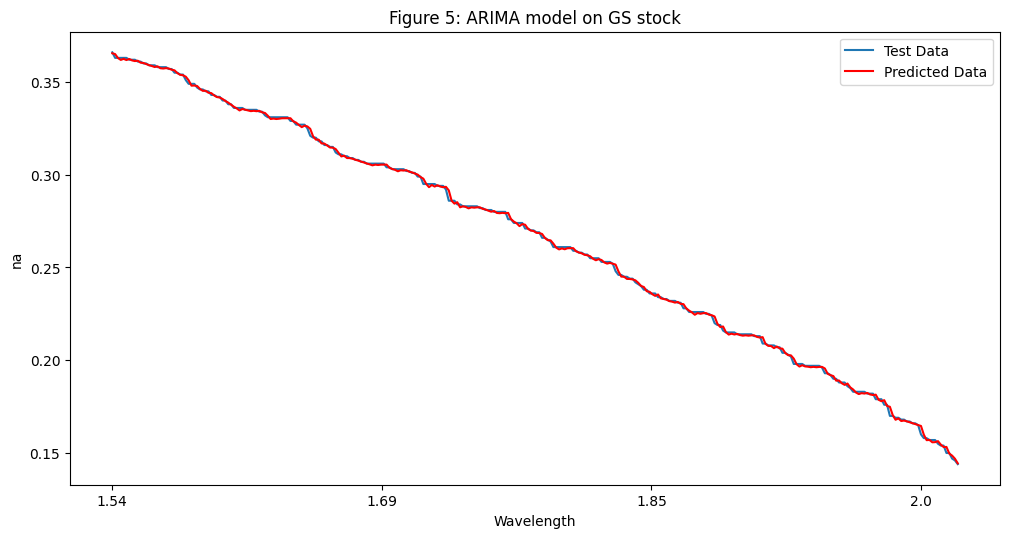

{'neff':             y_train
wavelength         
0.500000    1.46532
0.501490    1.46532
0.502979    1.46495
0.504469    1.46495
0.505958    1.46453
...             ...
1.980636    1.26808
1.982125    1.26808
1.983615    1.25511
1.985104    1.23975
1.986594    1.23975

[999 rows x 1 columns], 'Aeff':              y_train
wavelength          
0.500000    0.452362
0.501490    0.452362
0.502979    0.458466
0.504469    0.458466
0.505958    0.465207
...              ...
1.980636    4.807030
1.982125    4.807030
1.983615    4.891990
1.985104    4.892000
1.986594    4.967300

[999 rows x 1 columns], 'disp':              y_train
wavelength          
0.500000    190.0990
0.501490     81.4156
0.502979    111.5120
0.504469    184.8690
0.505958     96.1496
...              ...
1.980636    117.3690
1.982125    111.0920
1.983615    107.8850
1.985104     79.2511
1.986594    136.6690

[999 rows x 1 columns], 'conf':                  y_train
wavelength              
0.500000   -7.663180e-22
0.501490   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.y_train   No. Observations:                  998
Model:                 ARIMA(5, 1, 0)   Log Likelihood                3637.716
Method:                       css-mle   S.D. of innovations              0.006
Date:                Sat, 13 Nov 2021   AIC                          -7261.432
Time:                        16:52:13   BIC                          -7227.092
Sample:                             1   HQIC                         -7248.379
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0033      0.001     -5.742      0.000      -0.004      -0.002
ar.L1.D.y_train    -0.0847      0.034     -2.496      0.013      -0.151      -0.018
ar.L2.D.y_train     0.5340      

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 0.000


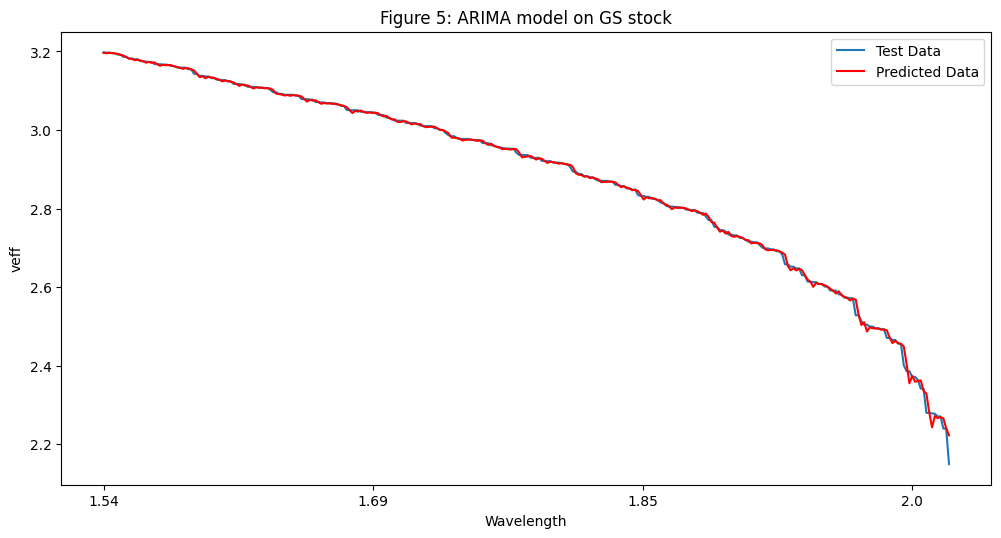

In [18]:
# First, we get the data
# We pick the tech companies from our list. We import each data and place it in a dictionary with key is its ticker symbol
stockList = ["neff", "Aeff", "disp", "conf", "bi", "pf", "eml", "sc", "bl", "tx", "rs", "nl", "na", "veff"]
dataset_ex_df = {}
for i in stockList:
    dataset_ex_df[i] = pd.read_excel("/content/" + i + "_train.xlsx", index_col="wavelength", parse_dates=["wavelength"])
    print(dataset_ex_df)
    Arima (dataset_ex_df, i)